In [3]:
import numpy as np
import pandas as pd
import scipy as sp
import astropy as ap
import matplotlib.pyplot as plt
import matplotlib.pyplot as pl
import scipy.stats
import scipy.optimize
import scipy.spatial
import scipy.cluster
import astropy.time
import astropy.units as u
import astropy.constants as c
# import emcee
# import corner
import sklearn
import sklearn.preprocessing
import sklearn.manifold
import sklearn.cluster

# For running on Colaboratory
# ! pip install corner
# ! pip install emcee

# custom_mplstyle = ("https://raw.githubusercontent.com/FoxFortino"
#                    "/DSPS_WFortino/main/custom.mplstyle")
# plt.style.use(custom_mplstyle)

In [4]:
file = ("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/"
        "master/HW7/kidpackgenes.csv")
data = pd.read_csv(file)

# 1 Explore The Data

In [5]:
data.shape

(2603, 75)

In [6]:
data.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,10,...,76,77,78,79,81,83,84,85,86,87
0,1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,...,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,...,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,...,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,...,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,...,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477


In [7]:
data.tail()

,Unnamed: 0,1,2,3,4,5,6,7,8,10,...,76,77,78,79,81,83,84,85,86,87
2598,2599,-0.387013,-0.351933,0.363170,-0.532783,-0.405961,-0.350308,0.607677,-0.033040,0.388872,...,0.013212,0.122758,0.260209,0.014410,0.155995,-0.184897,0.073087,-0.095532,-0.348209,0.390796
2599,2600,-0.167853,-0.316385,0.087252,-0.117309,-0.871179,-0.468648,0.068771,-0.143372,2.719371,...,2.107459,-0.798081,-0.395218,-0.850703,-0.268263,-0.573838,2.586922,-0.532048,-0.416461,0.340277
2600,2601,-0.793226,-0.316129,-0.330165,-1.328636,-0.776035,-0.114225,0.255864,-0.005224,0.380932,...,-0.403937,-0.203626,0.127042,-0.407454,0.075773,-0.581201,-0.471235,-0.151244,-0.742843,0.051671
2601,2602,-0.136738,-0.473996,-0.065985,-0.389660,-0.246289,-0.234996,0.446785,-0.226391,-0.231487,...,-0.009820,0.317453,0.242149,-0.427865,0.213364,-0.634293,-0.008888,-0.313828,-0.471017,-0.023894
2602,2603,-0.202742,-0.143678,0.357981,-0.806248,0.108837,0.101487,0.813528,0.589563,0.368431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# This tells me only the very last row has NaNs in it. I will just delete that data point since it is only one of 2600.
np.isnan(data).sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
data = data.iloc[:-1, :]

In [10]:
# No more NaNs
np.isnan(data).sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
data.describe()

,Unnamed: 0,1,2,3,4,5,6,7,8,10,...,76,77,78,79,81,83,84,85,86,87
count,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,...,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000
mean,1301.500000,-0.074219,-0.004992,0.005083,-0.079159,-0.042852,0.015122,-0.059658,-0.039993,-0.088130,...,-0.038404,-0.032761,-0.001378,-0.022449,0.026098,-0.064188,-0.027919,0.007936,-0.114165,-0.010700
std,751.277024,0.494020,0.346403,0.331839,0.692958,0.428961,0.339459,0.379709,0.351300,0.455827,...,0.484102,0.405609,0.317786,0.353947,0.395140,0.397782,0.457248,0.493876,0.533757,0.335695
min,1.000000,-2.205219,-1.779857,-3.072872,-3.491640,-2.479485,-2.720292,-1.807954,-1.835609,-3.214822,...,-2.946771,-3.281180,-2.787443,-1.938678,-2.932198,-3.054572,-3.013660,-2.955538,-2.909000,-1.563549
25%,651.250000,-0.378972,-0.212770,-0.179147,-0.506662,-0.276024,-0.144611,-0.309549,-0.234297,-0.332846,...,-0.321877,-0.277627,-0.170285,-0.238644,-0.206238,-0.265784,-0.261281,-0.256625,-0.422915,-0.212951
50%,1301.500000,-0.057153,0.003918,-0.011510,-0.024008,-0.027598,0.034582,-0.085066,-0.033071,-0.098703,...,-0.033654,-0.026236,0.012529,0.001720,0.003257,-0.047035,-0.039928,-0.024506,-0.075831,-0.026457
75%,1951.750000,0.256105,0.207058,0.165642,0.407486,0.207602,0.215217,0.146617,0.171049,0.156930,...,0.240125,0.215268,0.181616,0.211429,0.225755,0.175587,0.195313,0.227098,0.248414,0.177426
max,2602.000000,2.403599,1.609597,2.357123,1.987768,2.278563,1.950901,1.957411,1.807777,2.719371,...,2.713504,1.592532,1.240428,1.352897,2.451836,1.733719,2.586922,3.230761,1.464012,1.623757


In [12]:
data = data.iloc[:, 1:]

In [13]:
data.head()

,1,2,3,4,5,6,7,8,10,11,...,76,77,78,79,81,83,84,85,86,87
0,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,...,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,...,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,...,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,...,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,...,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477


# 2 Preprocess The Data

In [14]:
scaled_data_arr = sklearn.preprocessing.scale(data)
dataS = pd.DataFrame(scaled_data_arr, columns=data.columns)
dataS.shape

(2602, 74)

In [15]:
tsne = sklearn.manifold.TSNE()
proj = tsne.fit_transform(dataS)

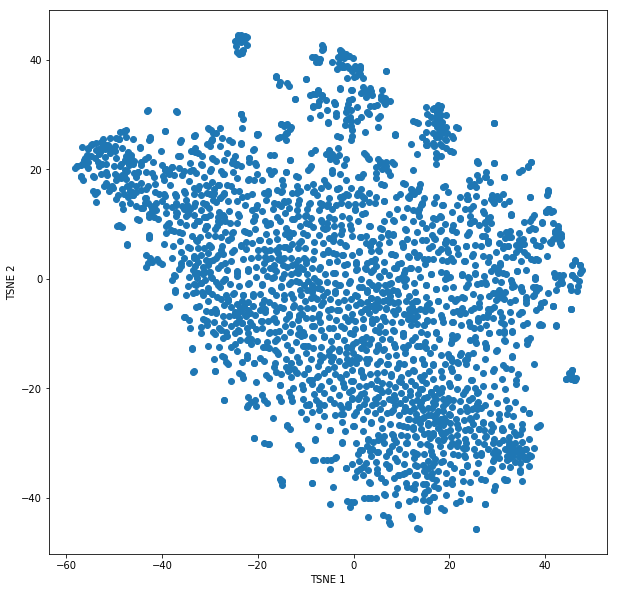

In [16]:
plt.figure(figsize=(10, 10))
plt.scatter(proj[:, 0], proj[:, 1])

plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
# plt.axis("equal")
plt.show()

### Figure 1: The 2D TSNE Projection of the 73-dimensional feature space for the 2602 points in this dataset. Some regions are already apparent that will be clustered together later on.

In [23]:
def calc_ICV(data, model):
    labels = model.labels_
    cluster_centers = model.cluster_centers_
    
    nClusters = np.unique(labels).shape[0]

    icv_arr = np.zeros(nClusters)
    for i in range(nClusters):
        Nk = np.sum(labels == i)
        points = (data[labels == i].values).T
        center = cluster_centers[i, :, np.newaxis]
        
        icv_arr[i] = np.sum(np.sum((points - center)**2, axis=0))
    
    return np.sum(icv_arr)

# 3 K-Means Clustering

In [24]:
rng = np.random.RandomState(193)
nCluster_arr = np.arange(1, 11)

ICV = np.zeros_like(nCluster_arr)
for i, nCluster in enumerate(nCluster_arr):
    kmeans = sklearn.cluster.KMeans(n_clusters=nCluster,
                                    init="k-means++",
                                    random_state=rng)
    kmeans.fit(dataS)
    ICV[i] = calc_ICV(dataS, kmeans)

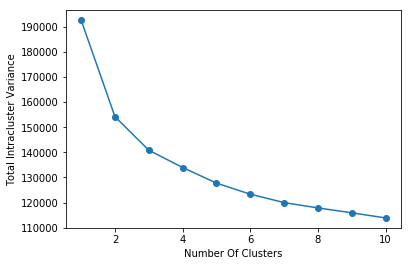

In [25]:
plt.plot(nCluster_arr, ICV, marker="o")
plt.ylabel("Total Intracluster Variance")
plt.xlabel("Number Of Clusters")
plt.show()

### Figure 2: The total intra-cluster variance for k-means clustering models as a function of number of clusters in the model. To determine the number of natural clusters in the data, we use the elbow method and look for a stark kink in this graph. We find no truly obvious kink, however, the rate at which the intracluster variance decreases is much lower after three clusters. Therefore, we choose three clusters for this dataset.

In [26]:
kmeans = sklearn.cluster.KMeans(n_clusters=3,
                                init="k-means++",
                                random_state=rng)
kmeans.fit(dataS)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=RandomState(MT19937) at 0x7F9F22EB5150, tol=0.0001,
    verbose=0)

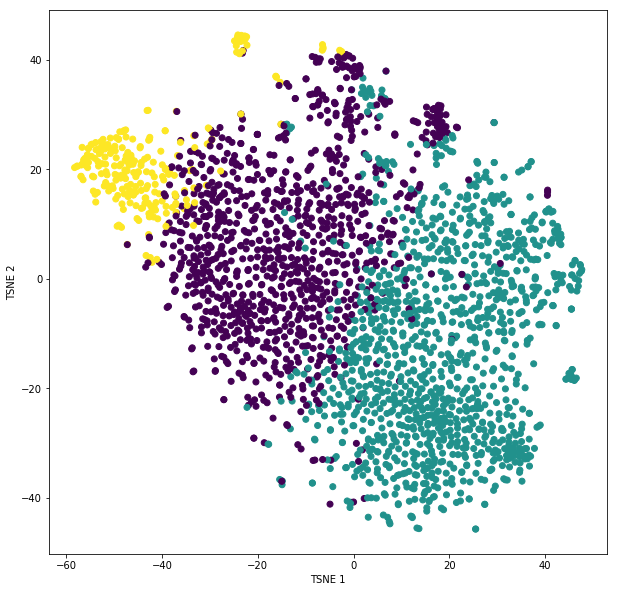

In [27]:
plt.figure(figsize=(10, 10))
plt.scatter(proj[:,0], proj[:,1],
            c=kmeans.labels_/ kmeans.n_clusters)

plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")

plt.show()

### Figure 3: The 2D TSNE Projection of the 73-dimensional feature space for the 2602 points in this dataset. Each points is color coded according to each of the three clusters in the model. It is difficult to imagine what this would look like in 73 dimensions, but we can see that the three clusters have extracted some features from the data.

In [20]:
dist_matrix = scipy.spatial.distance_matrix(dataS.values, dataS.values)

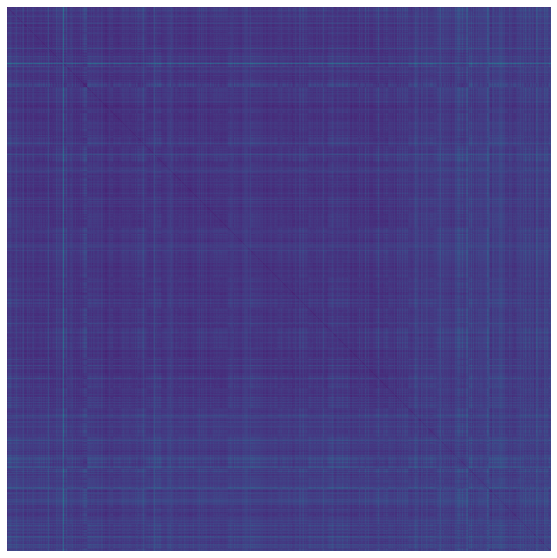

In [21]:
plt.figure(figsize=(10, 10))
plt.imshow(dist_matrix)
plt.axis("off")
plt.show()

### Figure 4: The distance matrix plotted for all pairs of 2602 73-dimensional points in the dataset. There is no obvious structure.

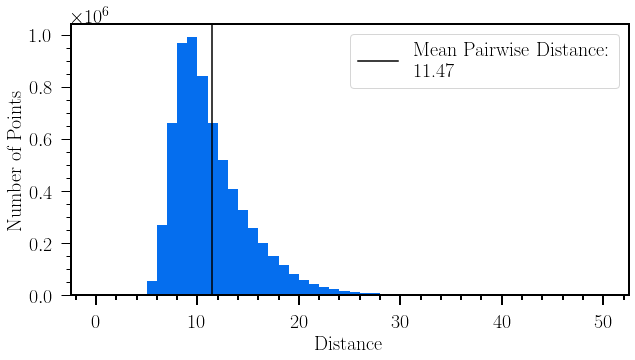

In [22]:
plt.figure(figsize=(10, 5))
plt.hist(dist_matrix.flatten(), bins=50, range=(0, 50))
mean = dist_matrix.flatten().mean()
plt.axvline(x=mean, label=f"Mean Pairwise Distance:\n{mean:.2f}")
plt.xlabel("Distance")
plt.ylabel("Number of Points")
plt.legend()
plt.show()

### Figure 5: Histogram of all pairwise euclidean distances in the dataset. The mean distance was 11.47. DBSCAN will be initialized with a value near this mean distance.

# 4 DBSCAN

In [23]:
dbscan = sklearn.cluster.DBSCAN(eps=mean/2, min_samples=10)
dbscan.fit(dataS)

DBSCAN(eps=5.733783570899396, min_samples=10)

In [24]:
labels = dbscan.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

n_clusters, n_noise

(3, 1262)

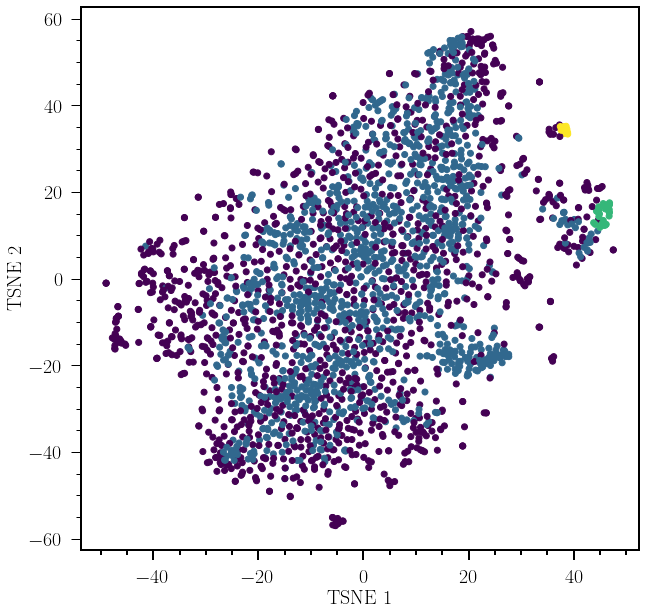

In [25]:
plt.figure(figsize=(10, 10))
plt.scatter(proj[:,0], proj[:,1],
            c=dbscan.labels_/ len(np.unique(dbscan.labels_)))

plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")

plt.show()

### Figure 6: The 2D TSNE Projection of the 73-dimensional feature space for the 2602 points in this dataset. The darkest points represent the 1262 outliers, and the other three colors represent the three clusters in the model. 1262 outliers seems to be a completely unreasonable amount of outliers, considering that is over half of the dataset. However, I would need more domain knowledge to more accurately assess whether that is an acceptable number of outliers.

# 5 Agglomerative Clustering

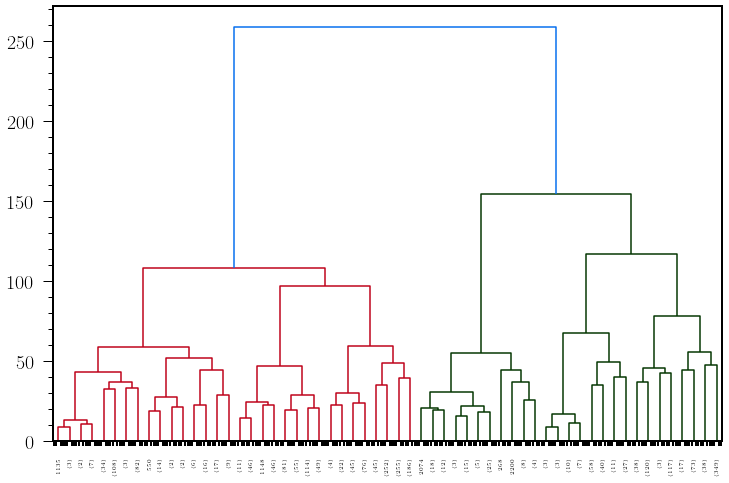

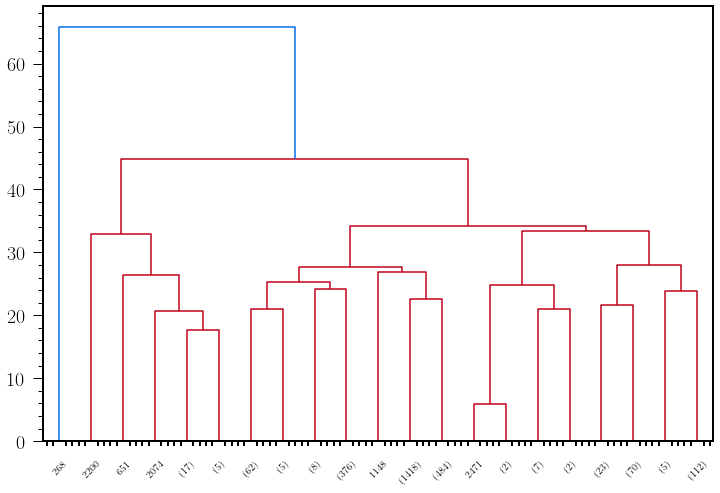

In [26]:
linkage = scipy.cluster.hierarchy.linkage(dataS, method="ward")
scipy.cluster.hierarchy.dendrogram(linkage, truncate_mode="level", p=5)
plt.show()


linkage = scipy.cluster.hierarchy.linkage(dataS, method="complete")
scipy.cluster.hierarchy.dendrogram(linkage, truncate_mode="level", p=5)
plt.show()

### Figure 7: Denderogram showing the agglomerative clustering tree using the ward linkage (top) and complete linkage (bottom). The ward linkage appears the most "tree-like" and balanced and the complete linkage dendrogram shows one rather isolated branch.

In [27]:
ac = sklearn.cluster.AgglomerativeClustering(n_clusters=3, linkage="ward")
ac.fit(dataS)

AgglomerativeClustering(n_clusters=3)

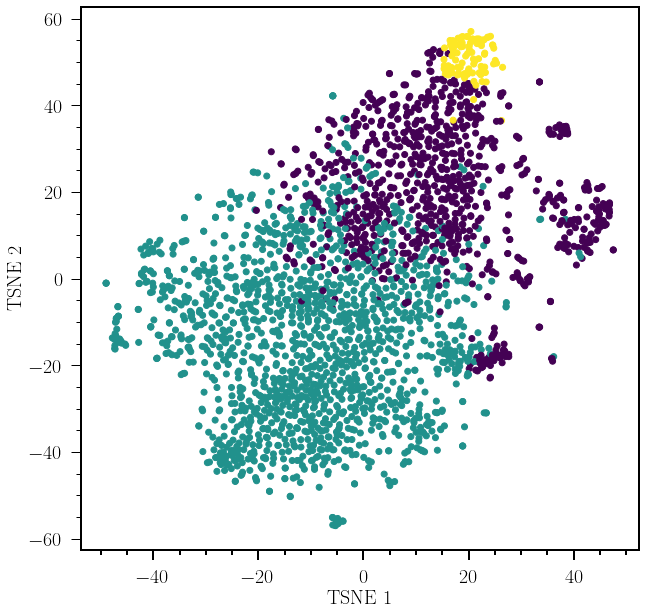

In [28]:
plt.figure(figsize=(10, 10))
plt.scatter(proj[:,0], proj[:,1],
            c=ac.labels_/ 3)

plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")

plt.show()

### Figure 8: The 2D TSNE Projection of the 73-dimensional feature space for the 2602 points in this dataset. Agglomerative clustering is used with three clusters. For the most part, these three clusters represent the three clusters seen in Figure 3 when K-Means clustering is used.

---

<h1 style="color:red"> Excellent !</h1>
